# PytorchのNNモジュール

In [1]:
import torch
import numpy as np
from torch import nn
from torch.nn import functional as F
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## nn.Linear

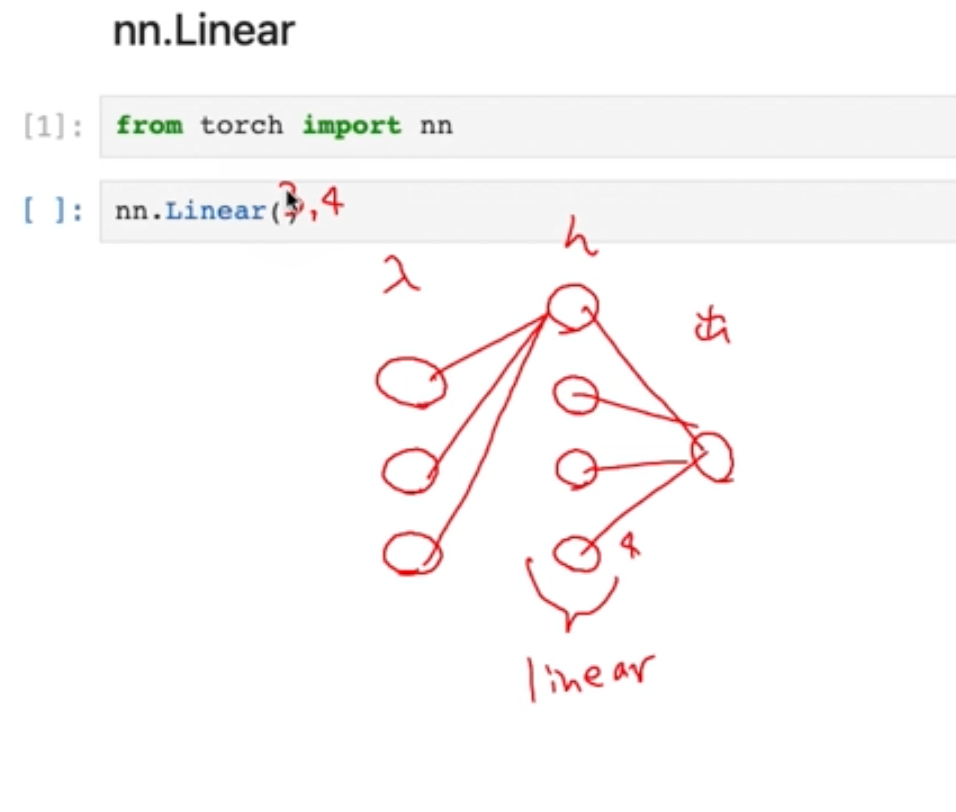

In [2]:
# in_features: 入力の次元、out_features: 出力の次元
# 上記の場合だと、入力の次元が3, 出力の次元が4
# mnistの場合は、8x8=64ピクセルの画像が入力で、出力（隠れ層）が30

# 線形変換のインスタンスを生成
linear = nn.Linear(64, 30)

In [3]:
# .parameters() で深層学習のパラメータを見れる
# W:weightと　b：biasのパラメータが見れる
list(linear.parameters())

[Parameter containing:
 tensor([[ 0.0042, -0.0805, -0.0225,  ...,  0.1080, -0.0027,  0.0246],
         [-0.0521,  0.0386,  0.0628,  ..., -0.0930, -0.0184, -0.0474],
         [ 0.1193, -0.0189,  0.0569,  ...,  0.0034,  0.0427, -0.0550],
         ...,
         [ 0.0851, -0.0664,  0.0034,  ...,  0.1237,  0.0100, -0.0557],
         [ 0.1119,  0.0701,  0.0940,  ...,  0.0068,  0.1245,  0.0181],
         [ 0.0782,  0.0428,  0.0317,  ..., -0.1121,  0.0081,  0.0869]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.1013,  0.0708, -0.0223, -0.0800,  0.1158,  0.0472,  0.0123, -0.0740,
         -0.1017,  0.0451, -0.0989,  0.0928,  0.0627,  0.0369,  0.0655,  0.0985,
         -0.1181, -0.1004, -0.0910,  0.1032,  0.0398, -0.0565, -0.0597, -0.1245,
          0.0708,  0.0519,  0.0550,  0.0497,  0.0368,  0.1223],
        requires_grad=True)]

In [4]:
linear.weight

Parameter containing:
tensor([[ 0.0042, -0.0805, -0.0225,  ...,  0.1080, -0.0027,  0.0246],
        [-0.0521,  0.0386,  0.0628,  ..., -0.0930, -0.0184, -0.0474],
        [ 0.1193, -0.0189,  0.0569,  ...,  0.0034,  0.0427, -0.0550],
        ...,
        [ 0.0851, -0.0664,  0.0034,  ...,  0.1237,  0.0100, -0.0557],
        [ 0.1119,  0.0701,  0.0940,  ...,  0.0068,  0.1245,  0.0181],
        [ 0.0782,  0.0428,  0.0317,  ..., -0.1121,  0.0081,  0.0869]],
       requires_grad=True)

In [5]:
linear.bias

Parameter containing:
tensor([-0.1013,  0.0708, -0.0223, -0.0800,  0.1158,  0.0472,  0.0123, -0.0740,
        -0.1017,  0.0451, -0.0989,  0.0928,  0.0627,  0.0369,  0.0655,  0.0985,
        -0.1181, -0.1004, -0.0910,  0.1032,  0.0398, -0.0565, -0.0597, -0.1245,
         0.0708,  0.0519,  0.0550,  0.0497,  0.0368,  0.1223],
       requires_grad=True)

In [6]:
# Wは出力x入力
# 今だと、出力30で、入力64なのでOK
linear.weight.shape

torch.Size([30, 64])

In [7]:
# biasは1ｘ出力の形
linear.bias.shape

torch.Size([30])

In [8]:
# linearはZ=XW.T+bを計算する式
# X:5x64、W:30x64、b:1x30、Z:5X30
X = torch.randn((5, 64))
Z = linear(X)
Z.shape

torch.Size([5, 30])

# nnモジュールでMLPモデルを作る

作成の仕方を大きく3つ
1. nn.classとF.functionを組み合わせる
2. nn.classのみで構成する
3. nn.Sequentialを使う

## 1. モデル作成 (nn.<クラス>+nn.<関数>)

nn.classとF.functionを組み合わせる
1. nn.Moduleクラスを継承するクラスを作成
2. パラメータを持つ層はnn.classで定義する
3. パラメータを持たない操作(活性化関数まど)は、F.functionで定義する
    - パラメータを持つ層の管理が容易になる

In [9]:
# 1層目(隠れ層)：linear
# 活性化関数のReLU
# 出力層:linear
# Loss(Pytorchでは損失関数はモデルに組み込まないのでlinear->ReLU->linearのモデルを作る)

# nn.Moduleクラスを継承するクラスを作成
class MLP(nn.Module):
    def __init__(self, num_in, num_hidden, num_out):
        super().__init__()  # 親クラスであるnn.Moduleのインスタンス変数を呼ぶ
        self.l1 = nn.Linear(in_features=num_in, out_features=num_hidden)  # 隠れ層のLinear層
        self.l2 = nn.Linear(in_features=num_hidden, out_features=num_out)  # 出力層のLinear層
        # モデルにはReLUも必要だが、ReLUはパラメータを持たない関数なので、F.functionで定義する

    # 順伝播の関数
    def forward(self, x):  
        # z1 = self.l1(x)
        # a1 = F.relu(z1)
        # z2 = self.l2(a1)
        # 下記のように1行で書くこともある.中間層の値を保存したい場合などは、上記で書く方が良い
        x = self.l2(F.relu(self.l1(x)))
        return x
    

In [10]:
model = MLP(64, 30, 10)

X = torch.randn(5, 64)
Z = model(X)
print(X)
print(Z)
print(Z.shape)

tensor([[-6.6056e-01, -1.9812e+00,  1.8255e-01,  2.9028e-01, -5.3260e-01,
         -3.9544e-02, -6.8783e-01,  8.8433e-01, -9.3852e-01, -5.5760e-01,
         -1.2558e-01,  3.6607e-01,  1.1517e+00,  6.8397e-01, -4.7639e-01,
          2.5775e+00,  3.4260e-01,  3.5265e-01, -6.1700e-01,  1.7296e+00,
         -9.7958e-01, -4.0411e-01,  2.2706e-01,  1.0298e+00,  2.7063e-01,
         -2.0270e+00, -5.0804e-01, -1.0824e-01, -3.5307e-01, -5.1564e-02,
          2.3110e-01, -5.1007e-02,  1.1546e-01, -4.9595e-01, -1.7083e-01,
         -8.1704e-01, -9.9751e-02,  7.8648e-03, -8.1541e-01, -9.1181e-01,
          1.0973e+00,  6.8025e-02,  2.0485e+00,  1.4079e+00,  6.0691e-01,
          4.5713e-01,  1.2685e+00, -7.0386e-02,  5.9176e-01,  9.1269e-01,
          6.1038e-01,  1.6545e-01, -6.3717e-01, -4.8759e-01, -3.0752e-02,
          4.2902e-01,  1.1706e+00, -2.4013e+00, -1.8505e+00, -1.5716e-01,
          2.4622e-01,  1.3646e+00,  1.4274e-01, -1.7177e+00],
        [ 1.2701e+00,  6.2248e-01, -1.3805e-01, -1

## 2. モデル作成 (nn.<クラス>のみ)

nn.classクラスのみで作成する
- パラメータを持たない操作もnn.classを使用する
- モデル全体の構造に一貫性が生まれ、パラメータの有無を意識する必要がなくなる
- 操作によっては、nn.classの方がF.functionよりも処理が重い場合がある

In [11]:
class MLP(nn.Module):
    def __init__(self, num_in, num_hidden, num_out):
        super().__init__() 
        self.l1 = nn.Linear(in_features=num_in, out_features=num_hidden)  # 隠れ層のLinear層
        self.l2 = nn.Linear(in_features=num_hidden, out_features=num_out)  # 出力層のLinear層
        self.relu = nn.ReLU()  # 活性化関数も定義してしまう

    def forward(self, x):
        x = self.l2(self.relu(self.l1(x)))
        return x

In [13]:
model = MLP(64, 30, 10)

X = torch.randn(5, 64)
Z = model(X)
# print(X)
# print(Z)
print(Z.shape)

torch.Size([5, 10])


## 3. モデル作成 (nn.Sequential)

nn.Sequentialを使う

- nn.Sequential()にnn.classのインスタンスを直列に引数に渡す
- nn.Sequential()は、NNのアーキテクチャを直列に定義するための簡単な方法
- 非常にシンプルなアーキテクチャを作成する際に便利
- 複雑なモデルには使えない
- よく使うので覚えておくこと。これを組み合わせて複雑なモデルを作ることもある。

In [14]:
num_in = 64
num_hidden = 30
num_out = 10

model = nn.Sequential(
    nn.Linear(num_in, num_hidden),  # 1し
    nn.ReLU(),
    nn.Linear(num_hidden, num_out)
)

In [14]:
Z = model(X)

In [15]:
Z.shape

torch.Size([5, 10])

# nnモジュール作成したMLPモデルを学習する

- 前回レクチャーで作成したMLPのモデルを学習する
- (GPUを使う場合はモデルのインスタンスに.to('cuda')メソッドを実行することでGPUに移動することができる)

In [16]:
# ================MLP自作クラス=================
class MLP(nn.Module):
    def __init__(self, num_in, num_hidden, num_out):
        super().__init__()  # 親クラスであるnn.Moduleのインスタンス変数を呼ぶ
        self.l1 = nn.Linear(in_features=num_in, out_features=num_hidden)  # 隠れ層のLinear層
        self.l2 = nn.Linear(in_features=num_hidden, out_features=num_out)  # 出力層のLinear層
        # モデルにはReLUも必要だが、ReLUはパラメータを持たない関数なので、F.functionで定義する

    # 順伝播の関数
    def forward(self, x):  
        x = self.l2(F.relu(self.l1(x)))
        return x

## Refactoring後の学習ループ(OptimizerやDataset, Dataloaderは後ほどRefactoring)
# ===データの準備====
dataset = datasets.load_digits()
data = dataset['data']
target = dataset['target']
images = dataset['images']
X_train, X_val, y_train, y_val = train_test_split(images, target, test_size=0.2, random_state=42)
X_train = (X_train - X_train.mean()) / X_train.std()
X_val = (X_val - X_train.mean()) / X_train.std()
X_train = torch.tensor(X_train.reshape(-1, 64), dtype=torch.float32)
X_val = torch.tensor(X_val.reshape(-1, 64), dtype=torch.float32)
y_train = torch.tensor(y_train)  # ================変更:Pytorchのcross_entropy()の引数targetは、one-hotの形を引数にしない=================
y_val =torch.tensor(y_val)  # ================変更:Pytorchのcross_entropy()の引数targetは、one-hotの形を引数にしない=================
batch_size = 30
num_batches = np.ceil(len(y_train)/batch_size).astype(int)
learning_rate = 0.01

# モデルの初期化
num_in = 64
num_hidden = 30
num_out = 10
model = MLP(num_in, num_hidden, num_out)

# ログ
train_losses = []
val_losses = []
val_accuracies = []
for epoch in range(100):
    # エポック毎にデータをシャッフル
    shuffled_indices = np.random.permutation(len(y_train))
    
    running_loss = 0.0
    
    for i in range(num_batches):
        
        # mini batch作成
        start = i * batch_size
        end = start + batch_size

        batch_indices = shuffled_indices[start:end]
        y = y_train[batch_indices] # batch_size x 10
        
        X = X_train[batch_indices] # batch_size x 64
        # 順伝播と逆伝播の計算
        preds = model.forward(X)  # ================変更：model.forward() -> model=================
        loss = F.cross_entropy(preds, y) # ================追加:損失関数は追加する必要がある=================
        loss.backward()
        running_loss += loss.item()

        # パラメータ更新
        with torch.no_grad():
            for param in model.parameters(): # ================追加：model.parameters()をイテレーションを回す=================
                param -= learning_rate * param.grad

        model.zero_grad()  # ================MLPの親クラスには.zero_grad()が実装されているのでそのまま=================

    # validation
    with torch.no_grad():
        preds_val = model(X_val)  # ================変更：model.forward() -> model=================
        val_loss = F.cross_entropy(preds_val, y_val) # ================追加:損失関数は追加する必要がある=================
        val_accuracy = torch.sum(torch.argmax(preds_val, dim=-1) == y_val) / y_val.shape[0]  # ================変更：y_valをone-hotの形から変更したのでargmaxを削除=================

    train_losses.append(running_loss/num_batches)
    val_losses.append(val_loss.item())
    val_accuracies.append(val_accuracy)
    print(f'epoch: {epoch}: train error: {running_loss/num_batches}, validation error: {val_loss.item()}, validation accuracy: {val_accuracy}')

epoch: 0: train error: 2.2501111378272376, validation error: 3.65152645111084, validation accuracy: 0.11388888955116272
epoch: 1: train error: 2.0868191719055176, validation error: 2.804438352584839, validation accuracy: 0.19166666269302368
epoch: 2: train error: 1.9244341552257538, validation error: 2.2240641117095947, validation accuracy: 0.3583333194255829
epoch: 3: train error: 1.7483436316251755, validation error: 1.8834699392318726, validation accuracy: 0.4972222149372101
epoch: 4: train error: 1.563276673356692, validation error: 1.53006911277771, validation accuracy: 0.6000000238418579
epoch: 5: train error: 1.3799476126829784, validation error: 1.3281174898147583, validation accuracy: 0.6583333611488342
epoch: 6: train error: 1.2063247710466385, validation error: 1.0412907600402832, validation accuracy: 0.7138888835906982
epoch: 7: train error: 1.0523180613915126, validation error: 0.810954213142395, validation accuracy: 0.769444465637207
epoch: 8: train error: 0.9209959916770

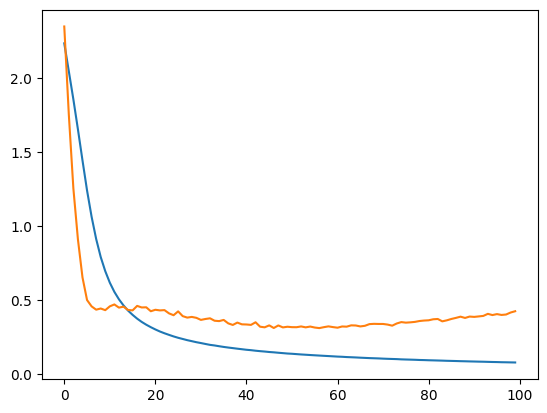

In [17]:
plt.plot(train_losses)
plt.plot(val_losses)

# モジュール/パラメータのイテレーション

- nn.Moduleを継承したモデルのクラスには、各コンポーネントやパラメータをイテレーションする機能が実装されている
    - .parameters()/.named_parameters(): パラメータのイテレーション
    - .children()/.named_children(): 直接の子のモジュールのイテレーション
    - modules()/.named_modules(): 自分自身を含む全てのモジュールのイテレーション
- 使用用途は特定のLayerに対して、追加の機能実装をしたいときなど(LinearのLayerにだけ機能追加したいときなど)にイテレーションを回して実装する

## パラメータのイテレーション

In [18]:
model

MLP(
  (l1): Linear(in_features=64, out_features=30, bias=True)
  (l2): Linear(in_features=30, out_features=10, bias=True)
)

In [19]:
for param in model.parameters():
    print(param.shape)

torch.Size([30, 64])
torch.Size([30])
torch.Size([10, 30])
torch.Size([10])


In [20]:
for name, param in model.named_parameters():
    print(name, param.shape)

l1.weight torch.Size([30, 64])
l1.bias torch.Size([30])
l2.weight torch.Size([10, 30])
l2.bias torch.Size([10])


## コンポーネントのイテレーション

In [21]:
for module in model.children():
    print(module)

Linear(in_features=64, out_features=30, bias=True)
Linear(in_features=30, out_features=10, bias=True)


In [22]:
for name, module in model.named_children():
    print(name, module)

l1 Linear(in_features=64, out_features=30, bias=True)
l2 Linear(in_features=30, out_features=10, bias=True)


In [23]:
# 自分自身も含む全てのモジュールを返す
for module in model.modules():
    print(module)

MLP(
  (l1): Linear(in_features=64, out_features=30, bias=True)
  (l2): Linear(in_features=30, out_features=10, bias=True)
)
Linear(in_features=64, out_features=30, bias=True)
Linear(in_features=30, out_features=10, bias=True)


In [24]:
for name, module in model.named_modules():
    print(name, module)

 MLP(
  (l1): Linear(in_features=64, out_features=30, bias=True)
  (l2): Linear(in_features=30, out_features=10, bias=True)
)
l1 Linear(in_features=64, out_features=30, bias=True)
l2 Linear(in_features=30, out_features=10, bias=True)
